<a href="https://colab.research.google.com/github/JaberRmstu/Machine-Learning-Lab/blob/main/Sentiment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,auc
import string
path ='/content/drive/MyDrive/ML/csv_file/'
# stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
data = pd.read_excel(path+'Final_Dataset.xlsx')
data

,review_text,lable
0,let gooo,neutral
1,prayed time,neutral
2,2003 world cup followed first time win today s...,positive
3,let goooo,neutral
4,men blue v men yellow almost mi v csk,neutral
...,...,...
50057,l crowd l crowd l crowd,positive
50058,well played australia hell game,negative
50059,feel bad rohit,negative
50060,well least prof cheat,negative


In [ ]:
data = data.rename(columns={'lable': 'Category'})
data = data.rename(columns={'review_text': 'Content'})

#Dataset Preparation

In [ ]:
print("Total Contents:",len(data),
      "\nTotal Positive Contents:",len(data[data.Category =='positive']),
      "\nTotal Negative Contents:",len(data[data.Category=='negative']),
      "\nTotal Neutral Contents:",len(data[data.Category=='neutral']))

Total Contents: 50062 
Total Positive Contents: 16770 
Total Negative Contents: 13371 
Total Neutral Contents: 19921


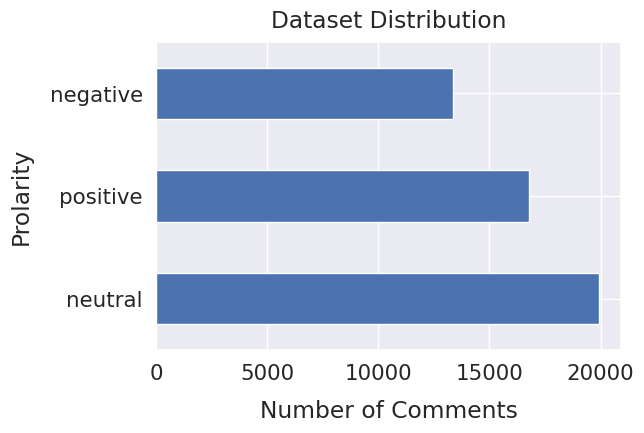

In [ ]:
sns.set(font_scale=1.4)
data['Category'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Prolarity", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
# print some unprocessed reviews
sample_data = [10,100,150]
for i in sample_data:
      print(data.Content[i],'\n','Comment:-- ',data.Category[i],'\n')

drowning anticipation right 
 Comment:--  positive 

let get bois 
 Comment:--  neutral 

seems everyone stole trouser time 
 Comment:--  neutral 



#Data Cleaning

In [ ]:


# Apply the function into the dataframe
data['cleaned'] = data['Content']

# print some cleaned contents from the dataset
sample_data = [20,50,100,200,700]
for i in sample_data:
  print('Original: ',data.Content[i],'\nCleaned:',
           data.cleaned[i],'\n','Category:--> ',data.Category[i],'\n')

Original:  hi bois early today 
Cleaned: hi bois early today 
 Category:-->  neutral 

Original:  match must absolute hell neutral lmao even root india v australia 
Cleaned: match must absolute hell neutral lmao even root india v australia 
 Category:-->  negative 

Original:  let get bois 
Cleaned: let get bois 
 Category:-->  neutral 

Original:  gavaskar wearing wellies cowboy crossover 
Cleaned: gavaskar wearing wellies cowboy crossover 
 Category:-->  positive 

Original:  bowl first kidding 
Cleaned: bowl first kidding 
 Category:-->  positive 



##Remove Low lenght data

In [ ]:
# Handle cases where the value is not a string (e.g., float or NaN)
data['length'] = data['cleaned'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Remove contents with less than 2 words
dataset = data.loc[data.length > 0]
dataset = dataset.reset_index(drop=True)


In [ ]:
# # Length of each contentss
# data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# # Remove the contents with least words
# dataset = data.loc[data.length>2]
# dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Contents".format(len(data)-len(dataset)),
      "\nTotal Contents:",len(dataset))

After Cleaning: 
Removed 104 Small Contents 
Total Contents: 49958


#Dataset Summary

In [ ]:
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Category.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.Category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Category==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)



Class Name :  neutral
Number of Documents:19817
Number of Words:102863
Number of Unique Words:12564
Most Frequent Words:

india	1619
australia	1061
head	893
get	856
not	853
wicket	846
need	808
ball	799
sky	767
kl	693

Class Name :  positive
Number of Documents:16770
Number of Words:145651
Number of Unique Words:12253
Most Frequent Words:

india	2892
australia	2080
win	1609
good	1411
not	1142
get	990
team	966
wicket	957
well	919
play	894

Class Name :  negative
Number of Documents:13371
Number of Words:105474
Number of Unique Words:10276
Most Frequent Words:

fuck	2109
india	1951
not	1051
australia	993
get	744
shit	724
kl	694
wicket	681
final	638
ball	629
Total Number of Unique Words:22011


#Dataset Summary Visualization

<ipython-input-52-186a769c5a2b>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(class_names, rotation=0);


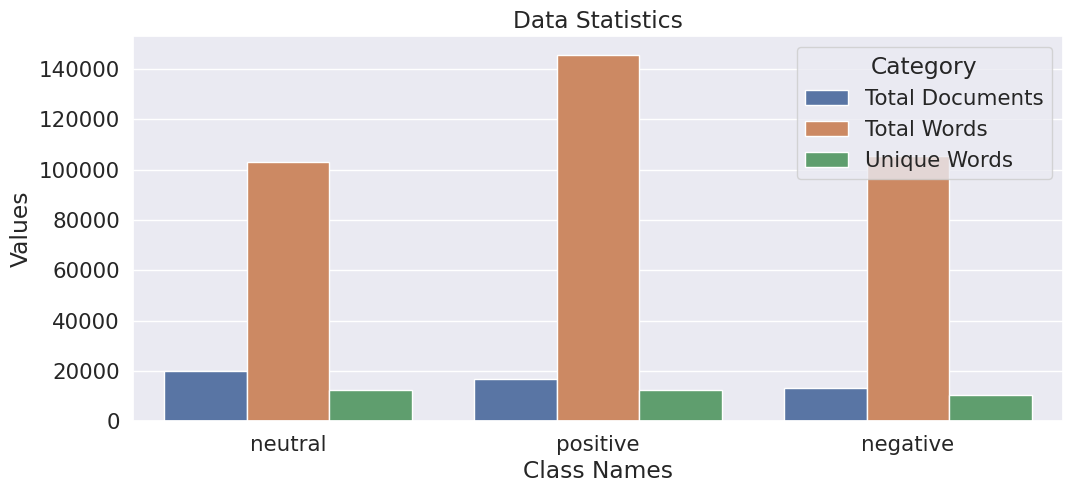

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 5))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=0);

#Comment Lenght Distribution

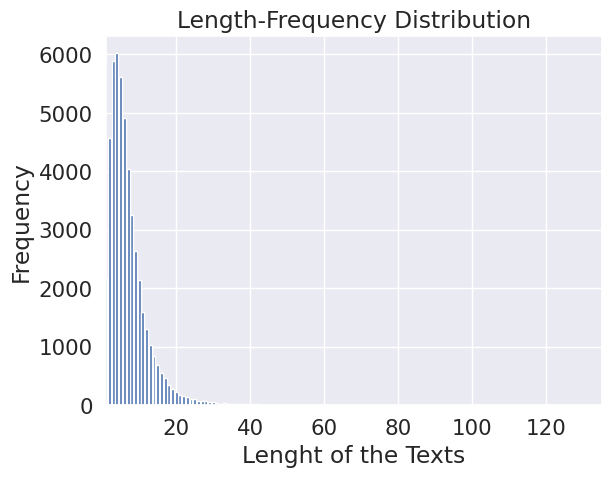

Maximum Length of a Content: 418
Minimum Length of a Content: 1
Average Length of a Content: 7.0


In [ ]:
# Calculate the Content of each of the Content
dataset['ContentLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ContentLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Content: {max(dataset.ContentLength)}")
print(f"Minimum Length of a Content: {min(dataset.ContentLength)}")
print(f"Average Length of a Content: {round(np.mean(dataset.ContentLength),0)}")

# Classes for Model Building

In [ ]:
# dataset.Tag = dataset.Tag.replace({'Chakma':'Chittagonian','Sylheti':'Bangla'})
Positive = dataset[dataset.Category == 'positive']
Negative = dataset[dataset.Category == 'negative']
Nutral = dataset[dataset.Category == 'nutral']
dataset.Category.value_counts()

,count
Category,
neutral,19817
positive,16770
negative,13371


##Lable Encoding and Dataset Splitting

In [ ]:
                                      #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')
    # print(labels.value_counts())

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #===========================================================

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.7,
                                                  test_size = 0.3,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test


In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

#**Model Building Using Machine Learning**

##Feature Extraction Using TF-IDF

In [ ]:
def calc_gram_tfidf(contents,gram):
    """
    This function will return the tf-idf value of the respective gram features .

    Args:
        contents: a list of cleaned contents

    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(contents)

    return tfidf,X


##Model Training

### For Unigram

In [ ]:
ngrams = [(1,1)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Category,False)
    # print(labels)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 22011

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 49958 
	Training		 34970 
	Test			 14988


## K-Nearest Neighbor(KNN)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn_model.fit(X_train,y_train)
knn_train = knn_model.score(X_train,y_train)
print('Training Accuracy:')
print(knn_train)

Training Accuracy:
0.7615384615384615


In [ ]:
knn_test = knn_model.score(X_test,y_test)
print('Testing Accuracy:')
print(knn_test)

Testing Accuracy:
0.599279423538831


In [ ]:
k_pred= knn_model.predict(X_test)

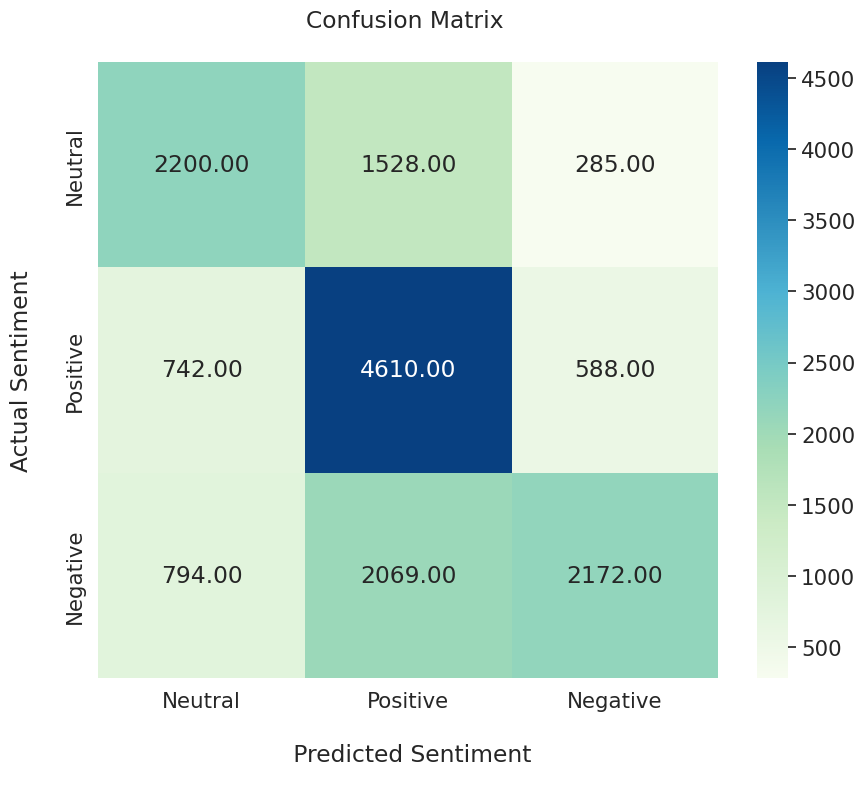

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,k_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Sentiment\n')
fx.set_ylabel('Actual Sentiment\n');
fx.xaxis.set_ticklabels(['Neutral','Positive','Negative'])
fx.yaxis.set_ticklabels(['Neutral','Positive','Negative'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, k_pred, average='macro'))
print('Precision:',precision_score(y_test, k_pred, average='macro'))
print('F1 score:', f1_score(y_test, k_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, k_pred))

recall: 0.5852309680955047
Precision: 0.6212937325324542
F1 score: 0.5857224153174192
Accuracy: 0.599279423538831


## **Logistic Regression**

In [ ]:
lr_model= LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_train = lr_model.score(X_train,y_train)
print('Training Accuracy:',lr_train)

Training Accuracy: 0.9027452101801544


In [ ]:
lr_test = lr_model.score(X_test,y_test)
print('Testing Accuracy:', lr_test)

Testing Accuracy: 0.8576861489191353


In [ ]:
lr_pred= lr_model.predict(X_test)

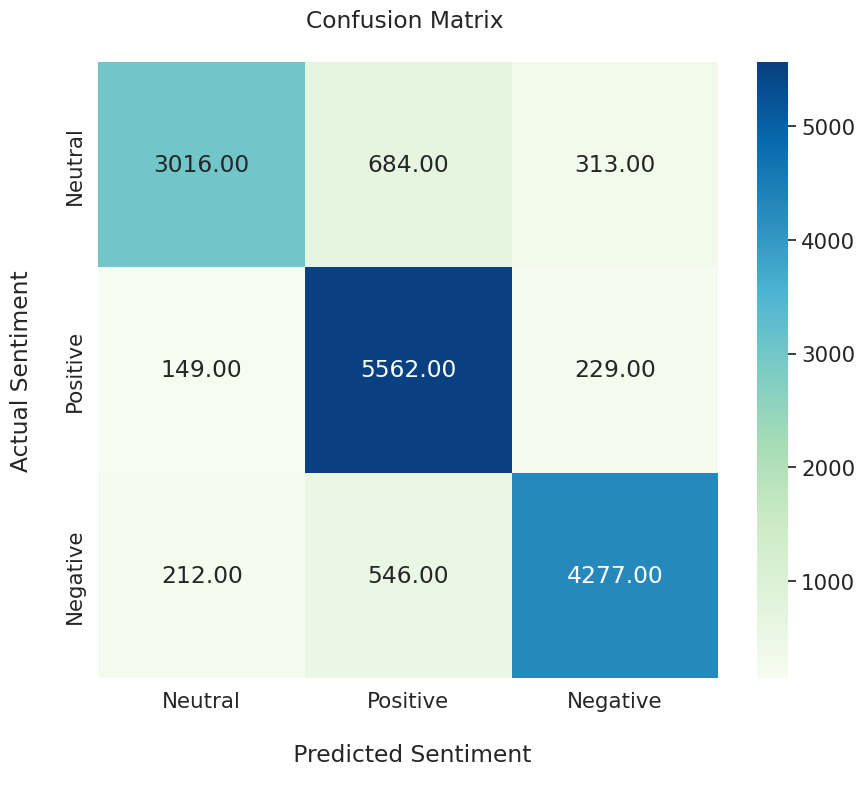

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Sentiment\n')
fx.set_ylabel('Actual Sentiment\n');
fx.xaxis.set_ticklabels(['Neutral','Positive','Negative'])
fx.yaxis.set_ticklabels(['Neutral','Positive','Negative'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, lr_pred, average='macro'))
print('Precision:',precision_score(y_test, lr_pred, average='macro'))
print('F1 score:', f1_score(y_test, lr_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, lr_pred))

recall: 0.8457916326421392
Precision: 0.8665111704957599
F1 score: 0.8526720303612003
Accuracy: 0.8576861489191353


### Random Forest

In [ ]:
rf_model= RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
rf_train = rf_model.score(X_train,y_train)
print('Training Accuracy:',rf_train)

Training Accuracy: 1.0


In [ ]:
rf_test = rf_model.score(X_test,y_test)
print('Testing Accuracy:', rf_test)

Testing Accuracy: 0.8646250333600214


In [ ]:
rf_pred= rf_model.predict(X_test)

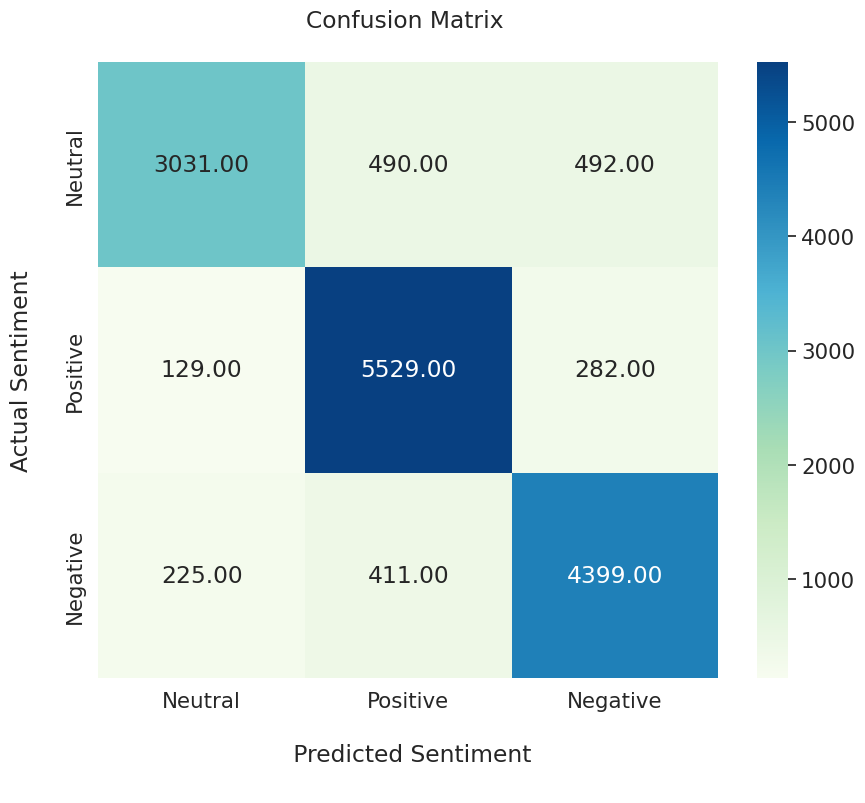

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Sentiment\n')
fx.set_ylabel('Actual Sentiment\n');
fx.xaxis.set_ticklabels(['Neutral','Positive','Negative'])
fx.yaxis.set_ticklabels(['Neutral','Positive','Negative'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, rf_pred, average='macro'))
print('Precision:',precision_score(y_test, rf_pred, average='macro'))
print('F1 score:', f1_score(y_test, rf_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, rf_pred))

recall: 0.8532625272136336
Precision: 0.8685578384570416
F1 score: 0.8584068788332259
Accuracy: 0.8646250333600214


### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_train = dt_model.score(X_train,y_train)
print('Training Accuracy:',dt_train)

Training Accuracy: 1.0


In [ ]:
dt_test = dt_model.score(X_test,y_test)
print('Testing Accuracy:', dt_test)

Testing Accuracy: 0.8464104617026955


In [ ]:
dt_pred= dt_model.predict(X_test)

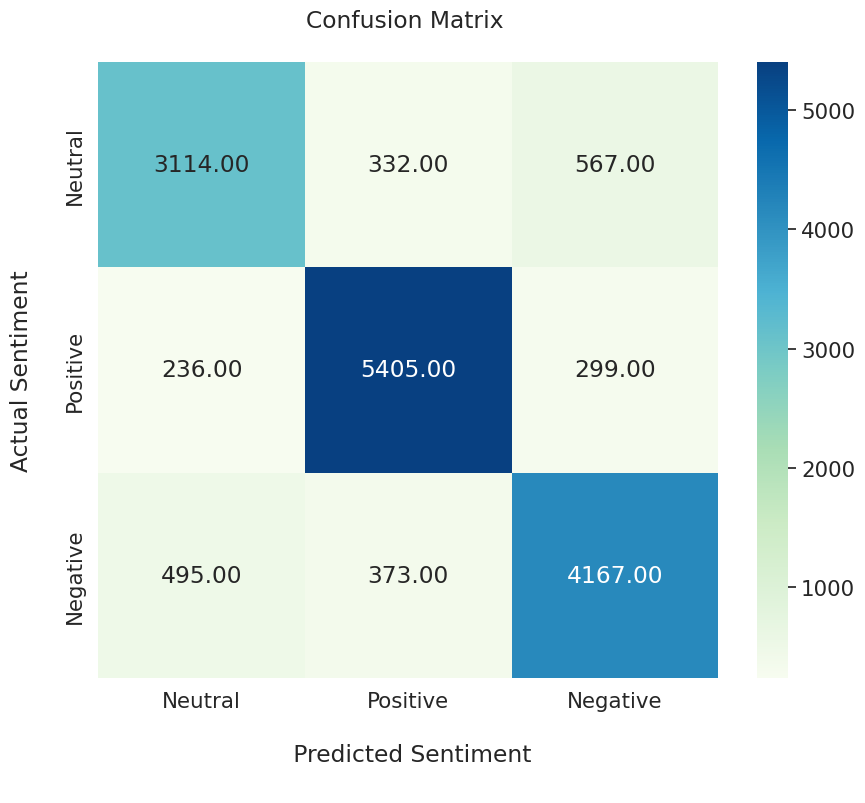

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,dt_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Sentiment\n')
fx.set_ylabel('Actual Sentiment\n');
fx.xaxis.set_ticklabels(['Neutral','Positive','Negative'])
fx.yaxis.set_ticklabels(['Neutral','Positive','Negative'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, dt_pred, average='macro'))
print('Precision:',precision_score(y_test, dt_pred, average='macro'))
print('F1 score:', f1_score(y_test, dt_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, dt_pred))

recall: 0.8378391613106405
Precision: 0.840811324793557
F1 score: 0.8391448917682364
Accuracy: 0.8464104617026955


### Multinomial Naive Bayes

In [ ]:
mnb_model = MultinomialNB(alpha=0.15)
mnb_model.fit(X_train, y_train)
mnb_train = mnb_model.score(X_train,y_train)
print('Training Accuracy:',mnb_train)

Training Accuracy: 0.9046611381183872


In [ ]:
mnb_test = mnb_model.score(X_test,y_test)
print('Testing Accuracy:', mnb_test)

Testing Accuracy: 0.7710168134507606


In [ ]:
mnb_pred= mnb_model.predict(X_test)

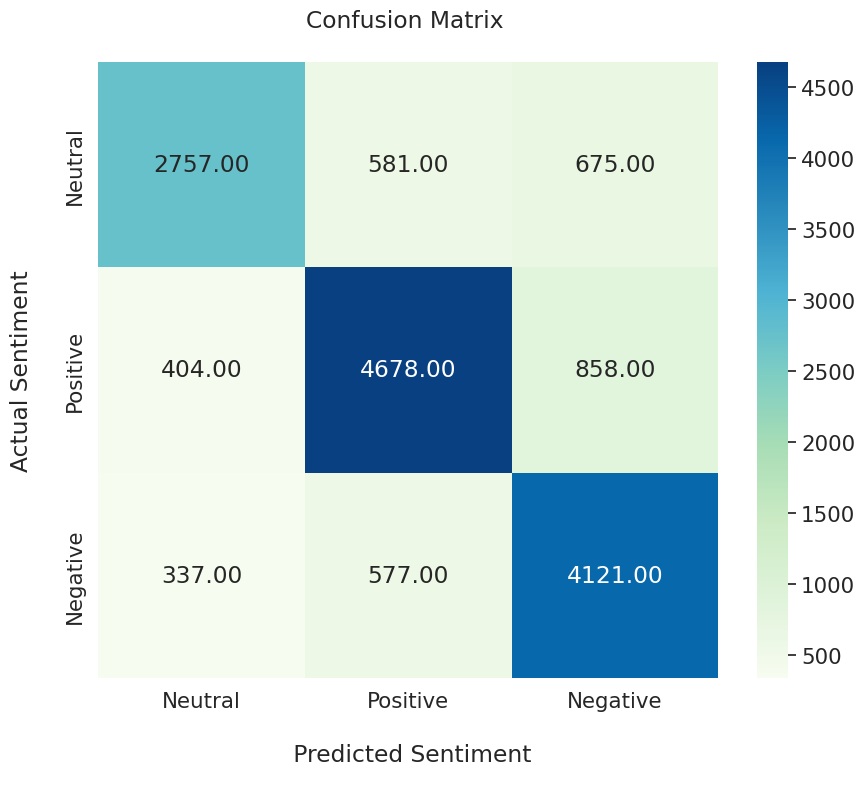

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Sentiment\n')
fx.set_ylabel('Actual Sentiment\n');
fx.xaxis.set_ticklabels(['Neutral','Positive','Negative'])
fx.yaxis.set_ticklabels(['Neutral','Positive','Negative'])
plt.show()


In [ ]:
print('recall:',recall_score(y_test, mnb_pred, average='macro'))
print('Precision:',precision_score(y_test, mnb_pred, average='macro'))
print('F1 score:', f1_score(y_test, mnb_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, mnb_pred))

recall: 0.7643433289085828
Precision: 0.7728685361411539
F1 score: 0.7665645447415556
Accuracy: 0.7710168134507606


### Linear Support Vector Machine

In [ ]:
lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
lsvm_model.fit(X_train, y_train)
lsvm_train = lsvm_model.score(X_train,y_train)
print('Training Accuracy:',lsvm_train)

Training Accuracy: 0.8287389190734915


In [ ]:
lsvm_test = lsvm_model.score(X_test,y_test)
print('Testing Accuracy:', lsvm_test)

Testing Accuracy: 0.8080464371497198


In [ ]:
lsvm_pred= lsvm_model.predict(X_test)

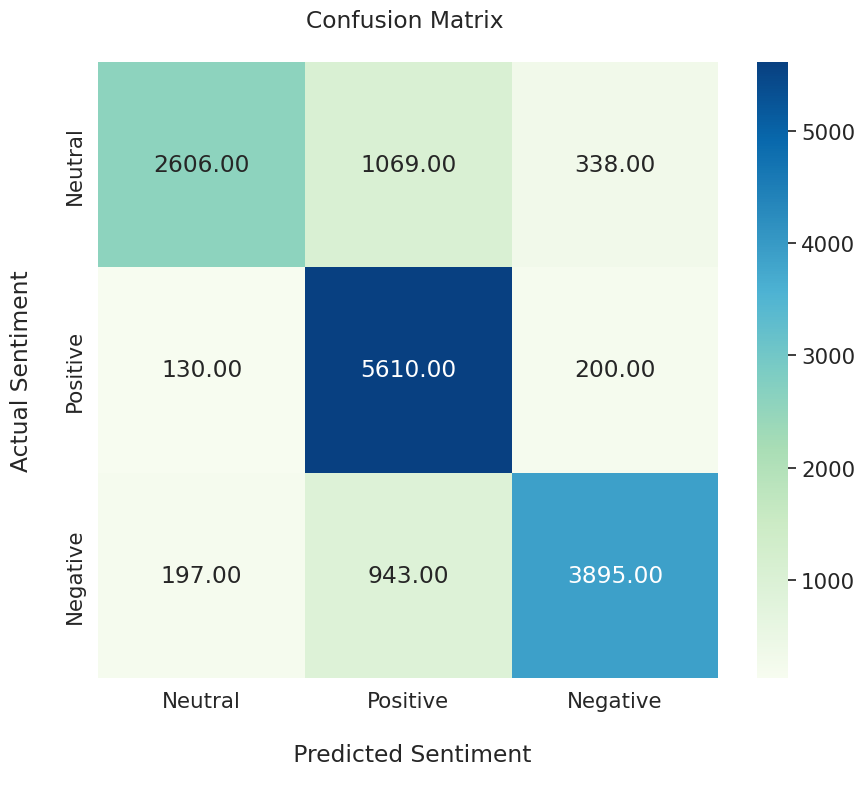

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,lsvm_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Sentiment\n')
fx.set_ylabel('Actual Sentiment\n');
fx.xaxis.set_ticklabels(['Neutral','Positive','Negative'])
fx.yaxis.set_ticklabels(['Neutral','Positive','Negative'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, lsvm_pred, average='macro'))
print('Precision:',precision_score(y_test, lsvm_pred, average='macro'))
print('F1 score:', f1_score(y_test, lsvm_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, lsvm_pred))

recall: 0.7891396114270828
Precision: 0.8343916129757324
F1 score: 0.8001476553260153
Accuracy: 0.8080464371497198


### RBF Support Vector Machine

In [ ]:
ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
ksvm_model.fit(X_train, y_train)
ksvm_train = ksvm_model.score(X_train,y_train)
print('Training Accuracy:',ksvm_train)

Training Accuracy: 0.861795824992851


In [ ]:
ksvm_test = ksvm_model.score(X_test,y_test)
print('Testing Accuracy:', ksvm_test)

Testing Accuracy: 0.8363357352548706


In [ ]:
ksvm_pred= ksvm_model.predict(X_test)

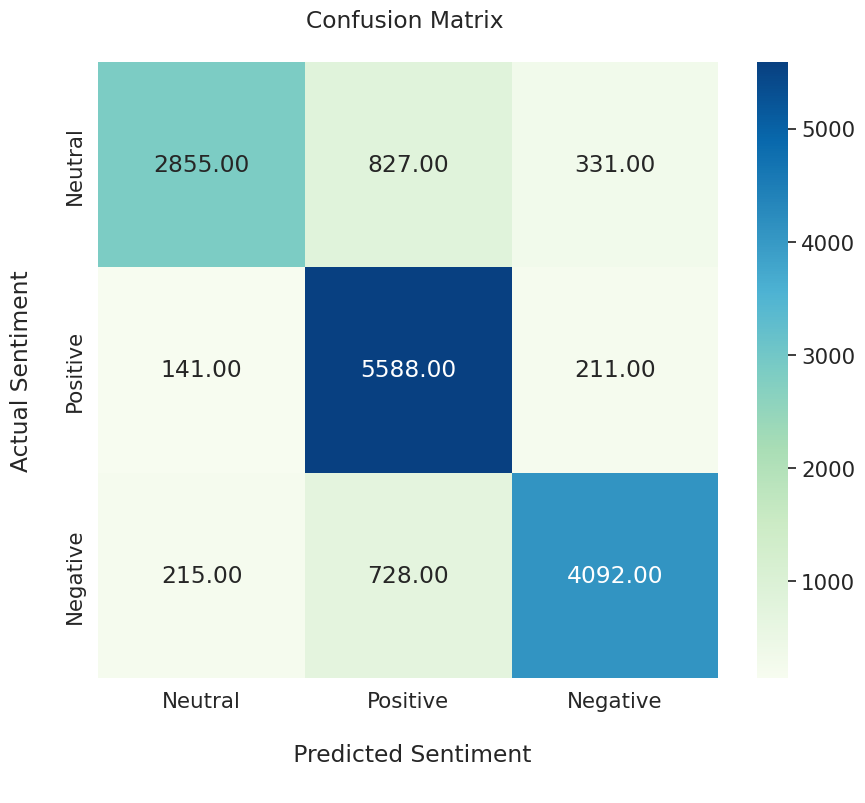

In [ ]:
plt.figure(figsize=(10,8))
fx=sns.heatmap(confusion_matrix(y_test,ksvm_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Sentiment\n')
fx.set_ylabel('Actual Sentiment\n');
fx.xaxis.set_ticklabels(['Neutral','Positive','Negative'])
fx.yaxis.set_ticklabels(['Neutral','Positive','Negative'])
plt.show()

In [ ]:
print('recall:',recall_score(y_test, ksvm_pred, average='macro'))
print('Precision:',precision_score(y_test, ksvm_pred, average='macro'))
print('F1 score:', f1_score(y_test, ksvm_pred, average='macro'))
print('Accuracy:',accuracy_score(y_test, ksvm_pred))

recall: 0.8216298635476361
Precision: 0.8514912924851389
F1 score: 0.8303585087621491
Accuracy: 0.8363357352548706


In [ ]:
def check():
    input_content = input('Enter input message: ')
    # print(Content)
    clean_content = input_content.translate(str.maketrans('', '', string.punctuation))
    transform_text = tfidf.transform([clean_content])
    pred = rf_model.predict(transform_text)

    if(pred[0] == 0):
      print('Negative')
    elif (pred[0] == 1):
      print('Neutral')
    else:
      print('Positive')

In [ ]:
check()

Enter input message: damn already 50m watching match
Negative
